<div style="text-align:center;">
<h2 style="background-color:#ffffff;font-family:candaralight;color:#B0B0B0;font-size:150%;text-align:center;border-radius:10px 10px;">Twitter Sentiment Analysis</h2>
</div>


#### Dự án "Twitter Sentiment Analysis" sử dụng dữ liệu cung cấp bởi Twitter, tiến hành dùng các mô hình mạng thần kinh và học máy cơ bản để phân loại cảm xúc của các tweet. Kết quả phân loại theo các mục là tích cực, tiêu cực hoặc trung tính.
#### - Dự án đã xây dựng thành web-app bằng thư viện Streamlit:
**Xem web-app :** [TeamQuocChienDuc](https://share.streamlit.io/kritanjalijain/twitter_sentiment_analysis/main/app.py)

**Dữ liệu sử dụng :** [Twitter Data](https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?select=Twitter_Data.csv)
#### Tóm tắt về dữ liệu: Dữ liệu được load từ API của Tweepy and PRAW. Dữ liệu đã được làm sạch bằng thư viện re và NLP, có label từ -1 đến 1
* [ 0 là label neutral ](#1)
* [ 1 là label positive](#2)
* [ -1 là label negative](#3)


#### - Mô hình sử dụng trong dự án:
* [Gate Recurrent Unit (GRU) ](#1)
* [Logistic Regression](#2)
* [Random Forest](#3)
* [Stochastic Gradient Descent (SGD)](#3)
   
 **<span style="color:red;"> Mong mọi người xem xét và cho ý kiến về Notebook.</span>**


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3498db; font-family:'Candara Light', sans-serif; color:#ffffff; font-size:175%;border-radius:10px; padding:10px;">Các mục chính</p>


* [1. Data OverView](#1)
    
    - [Import library](#1.1)
    
    - [Load dataset](#1.2)
    
    - [Data Cleaning](#1.3)
        
* [2. Exploratory Data Analysis](#2)      

* [3. Data Preprocessing ](#3)

* [4. Modeling](#4)
    
    - [Gate Recurrent Unit (GRU)](#4.1)
    - [Data Preprocessing For Machine Learning Model](#4.2)
    - [Logistic Regression](#4.3)
    - [Random Forest](#4.4)
    - [Stochastic Gradient Descent (SGD)](#4.5)

* [5. Model Evaluation and Comparison](#5)



## DATA OVERVIEW

### Import Library

In [ ]:
# Thư viện xử lý
import pandas as pd
import numpy as np
import os
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import sqlite3

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, GRU, Dense, Dropout, BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
import keras.backend as K
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Twitter-Sentimental-Analysis/data/Twitter_Data_2.csv', encoding='utf-8')

In [ ]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


### Data Cleaning

In [ ]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
data.shape

(162980, 2)

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape

(162969, 2)

In [ ]:
data.isnull().sum()

clean_text    0
category      0
dtype: int64

## EXPLORATORY DATA ANALYSIS

### Mapping

*Tiến hành map category để phân tích thông tin dữ liệu*

In [ ]:
df = data.copy()
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


### Distribution of category

Text(0, 0.5, 'Number')

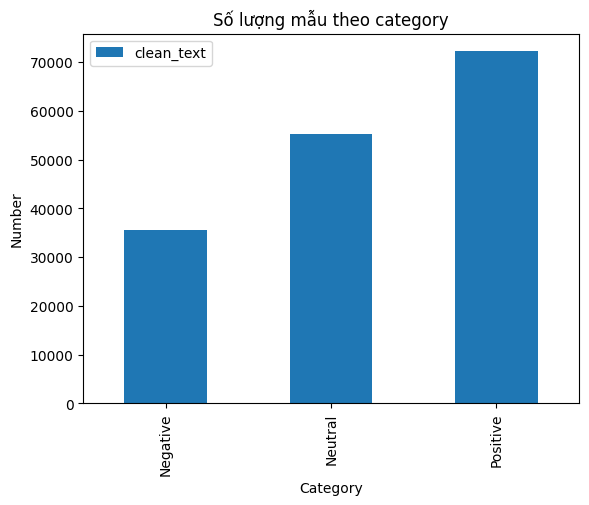

In [ ]:
grouped_df = df.groupby('category').count()
plot = grouped_df.plot(kind='bar')
plt.title('Số lượng mẫu theo category')
plt.xlabel('Category')
plt.ylabel('Number')

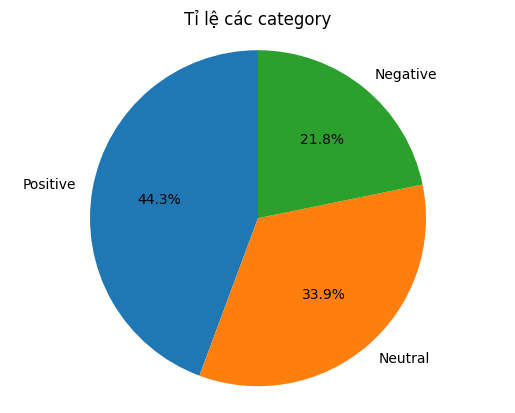

In [ ]:
labels = df['category'].value_counts().index.to_list()
sizes = df['category'].value_counts().to_list()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Tỉ lệ các category')
plt.show()


Nhận xét 1:
- Tỉ lệ dữ liệu theo category tăng dần từ negative lên positive.
- Dữ liệu được sử dụng đã được nhóm CHAITHANYA KUMAR A làm sạch cơ bản và xử lý bằng thư viện re và NLP trước khi đưa lên nguồn chính.

### Distribution of tweet lengths

In [ ]:
tweet_len = df['clean_text'].apply(lambda x: len(x.split()))
df_tweet_len = pd.DataFrame({'tweet_length': tweet_len})

fig = px.box(df_tweet_len, y='tweet_length', title='Phân phối độ dài của các tweet')

fig.show()

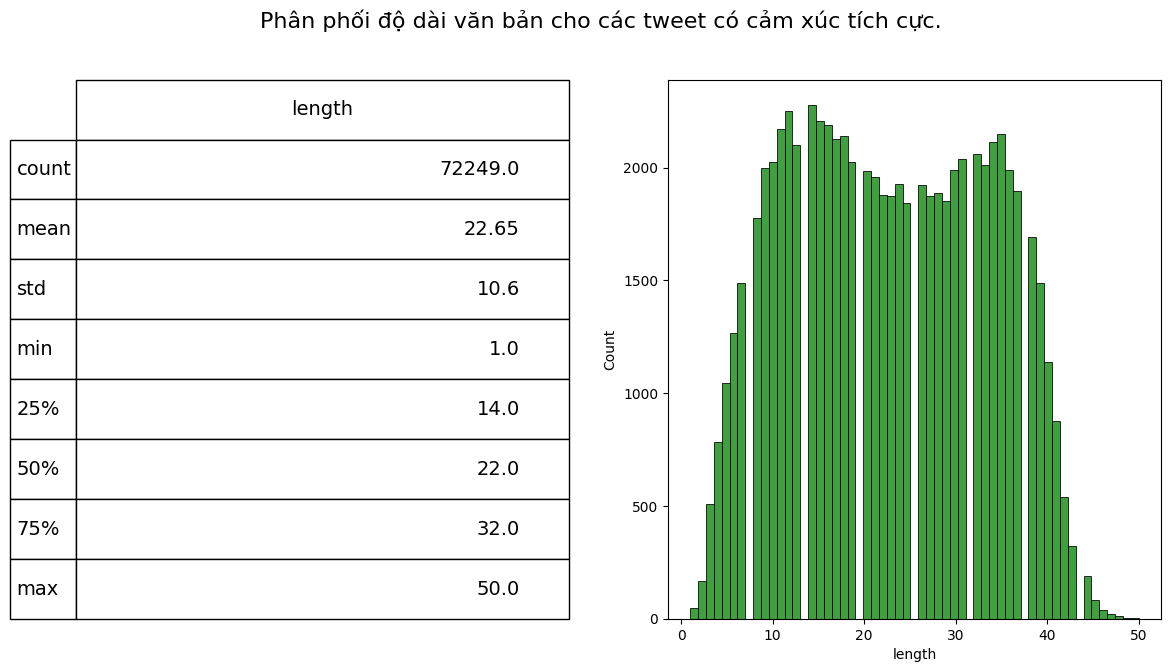

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Phân phối độ dài văn bản cho các tweet có cảm xúc tích cực.', fontsize=16)

plt.show()

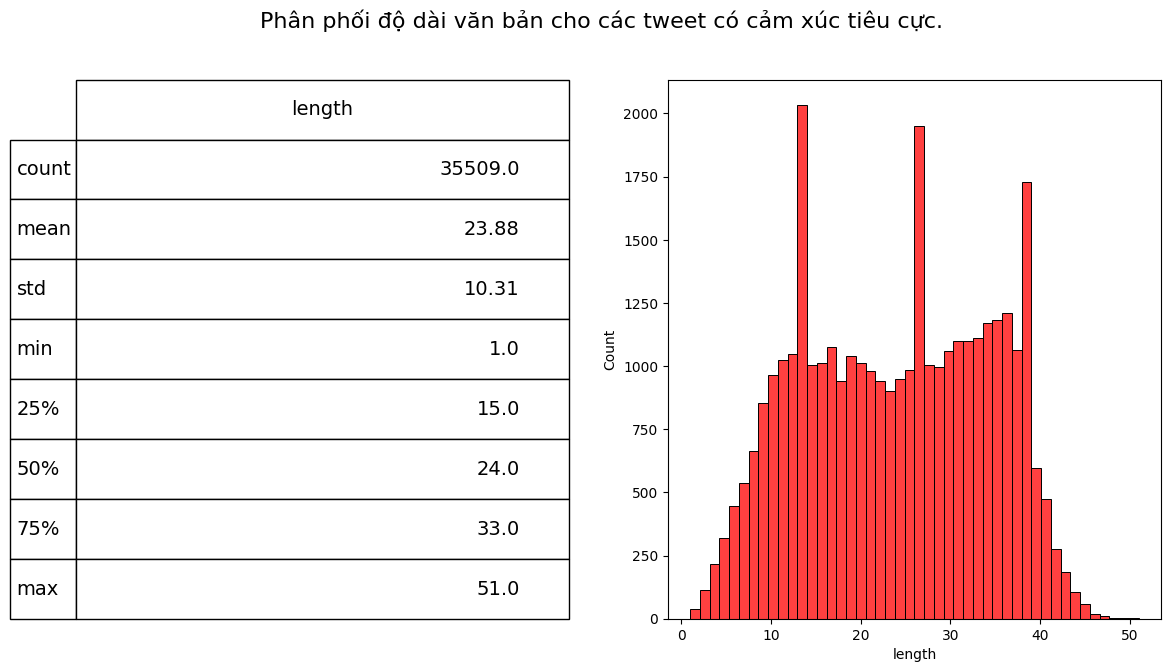

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Phân phối độ dài văn bản cho các tweet có cảm xúc tiêu cực.', fontsize=16)

plt.show()


Nhận xét 2
- Phân phối độ dài của các comment chủ yếu nằm trong khoảng từ 0 đến 50.
- Phân phối độ dài này được diễn ra ở cả positive và negative

### Word frequency by category

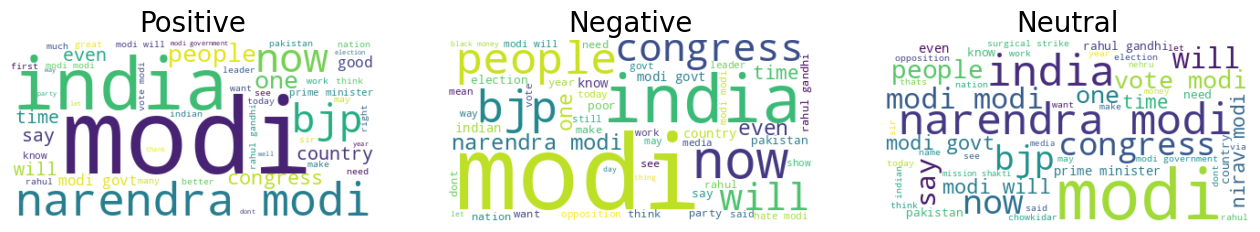

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(df, category, max_words=50):

  # Lọc dữ liệu theo category
  df_category = df[df['category'] == category]

  # Tạo text từ các tweet trong category
  text = " ".join(df_category['clean_text'].tolist())

  # Xóa stopwords và từ lặp lại
  stopwords = set(STOPWORDS)
  stopwords.update(['rt', 'amp'])
  text = " ".join([word for word in text.split() if word not in stopwords])

  # Tạo wordcloud
  wordcloud = WordCloud(max_words=max_words, background_color="white").generate(text)

  return wordcloud

# Tạo wordcloud cho mỗi category
positive_wordcloud = generate_wordcloud(df, 'Positive')
negative_wordcloud = generate_wordcloud(df, 'Negative')
neutral_wordcloud = generate_wordcloud(df, 'Neutral')

# Hiển thị các wordcloud
plt.figure(figsize=(16, 12))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive", fontsize=20)

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative", fontsize=20)

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral", fontsize=20)

plt.show()


Nhận xét 3:
- Từ khóa chỉnh, nhiều tweet đề cập nhất là tên modi, các từ khóa liên quan đến thủ tướng tiếp theo của Ấn độ năm 2019

## DATA PREPROCESSING

### Set Stopword and cleaning data

*Dữ liệu trước đó đã được CHAITHANYA KUMAR A xử lý, làm sạch trước đó, các bước stemming (hoặc lemmatizer) để chuyển từ về trạng thái gốc của nó đã hoàn thành.*

*Cho nên nhóm sẽ không tiến hành xử lý bước này, mà chỉ lọc lại dữ liệu một lần nữa để xóa stop_words(các từ không có nghĩa) và xóa các ký tự đặc biệt để tránh làm mất dữ liệu, giảm hiệu quả mô hình*

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [ ]:
data['clean_text'] = data['clean_text'].astype(str)

In [ ]:
data['clean_text'] = data['clean_text'].apply(clean_text)

In [ ]:
data

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0
...,...,...
162975,crores paid neerav modi recovered congress lea...,-1.0
162976,dear rss terrorist payal gawar modi killing pl...,-1.0
162977,cover interaction forum left,0.0
162978,big project came india modi dream project happ...,0.0


### Sqlite connection to find sensitive word frequency

*Nhóm sử dụng sqlite3 để lưu trữ danh sách từ, sau đó dùng nó để query ra top đầu những từ có nội dung nhạy cảm, phục vụ việc tokenizer và padding dữ liệu, tăng hiệu quả mô hình.*

In [ ]:
conn = sqlite3.connect('binary_analysis_2.db')

In [ ]:
cursor = conn.cursor()

In [ ]:
from google.colab import files
files.download('binary_analysis_2.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS twitter (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    clean_text TEXT,
    category INTEGER
);
''')

In [ ]:
for index, row in data.iterrows():
    cursor.execute("INSERT INTO twitter (clean_text, category) VALUES (?, ?)", (row['clean_text'], row['category']))


conn.commit()

In [ ]:
sql_query = """
WITH RECURSIVE split(word, str) AS (
    SELECT '', clean_text || ' ' FROM twitter WHERE category = -1
    UNION ALL
    SELECT
        SUBSTR(str, 0, INSTR(str, ' ')),
        LTRIM(SUBSTR(str, INSTR(str, ' ')))
    FROM split
    WHERE str != ''
)
SELECT word, COUNT(*) AS word_count
FROM split
WHERE word != ''
GROUP BY word
ORDER BY word_count DESC;

"""

cursor.execute(sql_query)
rows = cursor.fetchall()

result_query_negative = pd.DataFrame(rows, columns=['word', 'word_count'])

In [ ]:
max_word_token_negative = len(result_query_negative[result_query_negative['word_count'] >= 5])
max_word_token_negative

9671

## MODEL

### Gate Recurrent Unit (GRU)

#### Tokenizer and Padding

In [ ]:
df = data.copy()

In [ ]:
X = df['clean_text']

In [ ]:
max_words = max_word_token_negative
max_len=50

def tokenize_pad_sequences(text):
    '''
    Hàm này mã hóa văn bản đầu vào thành các chuỗi số nguyên và sau đó
    đệm mỗi chuỗi có cùng độ dài
    '''
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer
print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples
After Tokenization & Padding 
 [   1  225  633   23 1583  712 1020 2247 1108  130  134   48   15   25
  969  134  458 3992 5260 2659    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
from google.colab import files
files.download('/content/tokenizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Train & Test Split

In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (117744, 50) (117744, 3)
Validation Set -> (20779, 50) (20779, 3)
Test Set -> (24446, 50) (24446, 3)


#### Calculate F1 Score

In [ ]:
def f1_score(precision, recall):
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#### Build Model

*Giải thích các lớp:*
- *Embedding Layer: Lớp nhúng, dùng để biểu diễn từ vựng dưới dạng các vector mật độ.*

- *Conv1D Layer: Lớp tích chập 1D, giúp mô hình học được các đặc trưng không gian của dữ liệu thông qua việc trượt bộ lọc (kernel) qua các chuỗi từ.*

- *MaxPooling1D Layer: Lớp tối đa hóa, giúp giảm kích thước của đầu ra từ lớp tích chập bằng cách chọn ra giá trị lớn nhất từ mỗi cửa sổ trượt.*

- *BatchNormalization Layer: Lớp chuẩn hóa dữ liệu đầu ra từ các lớp trước đó, giúp tăng tốc quá trình huấn luyện và ổn định hóa mô hình.*

- *Dropout Layer: Lớp loại bỏ ngẫu nhiên một phần tử của đầu vào với một tỷ lệ xác suất nhất định, giúp tránh tình trạng overfitting.*

- *Bidirectional GRU Layer: Lớp GRU (Gated Recurrent Unit) hai chiều, một dạng của mạng nơ-ron hồi quy (RNN), được sử dụng để hiểu và học cấu trúc chuỗi trong dữ liệu.*

- *Dense Layer: Lớp kết nối đầy đủ, thường được sử dụng ở cuối mạng nơ-ron để kết hợp thông tin từ các lớp trước và tạo ra dự đoán cuối cùng.*

- *Activation Function: Được sử dụng để giới hạn đầu ra của mỗi nơ-ron trong mạng. Ở đây, softmax được sử dụng cho lớp cuối cùng để chuyển đổi đầu ra thành xác suất của các lớp đích (negative, neutral, positive).*

In [ ]:
# Các tham số mô hình
embedding_size = 32

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_size, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=32)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Tóm tắt mô hình
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            309472    
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            10304     
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 64)            0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 25, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 25, 128)           4

#### Architecture diagram of the Keras model

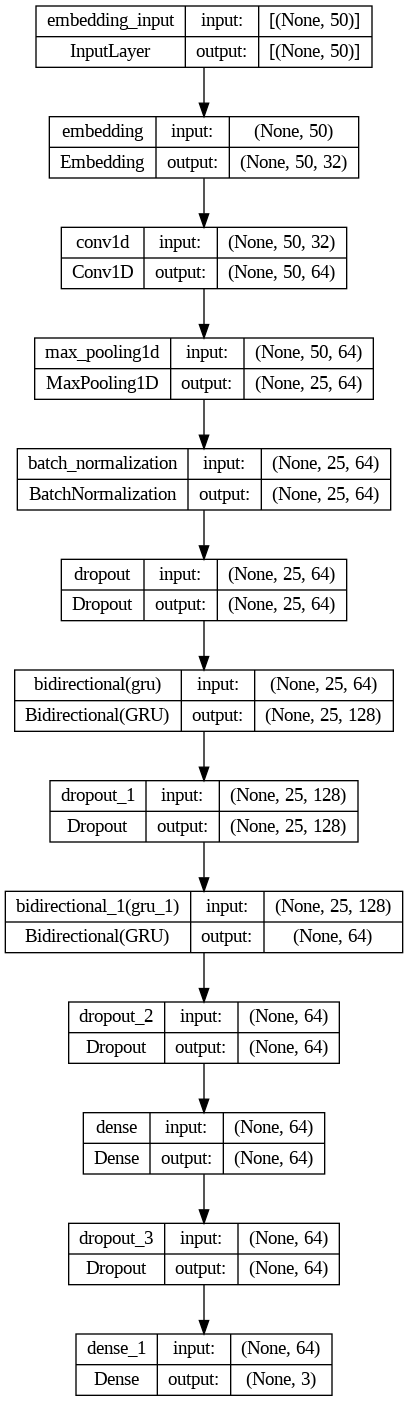

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### Compile and Train model

In [ ]:
batch_size= 64
epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, batch_size= batch_size,  validation_data=(X_val, y_val), epochs=epochs, verbose=1)


Epoch 1/10
1840/1840 [==============================] - 236s 123ms/step - loss: 0.5110 - accuracy: 0.8151 - precision: 0.8564 - recall: 0.7664 - val_loss: 0.3144 - val_accuracy: 0.9096 - val_precision: 0.9131 - val_recall: 0.9061
Epoch 2/10
1840/1840 [==============================] - 207s 112ms/step - loss: 0.3170 - accuracy: 0.9104 - precision: 0.9171 - recall: 0.9018 - val_loss: 0.2980 - val_accuracy: 0.9152 - val_precision: 0.9183 - val_recall: 0.9119
Epoch 3/10
1840/1840 [==============================] - 156s 85ms/step - loss: 0.2890 - accuracy: 0.9184 - precision: 0.9260 - recall: 0.9095 - val_loss: 0.2938 - val_accuracy: 0.9157 - val_precision: 0.9189 - val_recall: 0.9114
Epoch 4/10
1840/1840 [==============================] - 157s 85ms/step - loss: 0.2626 - accuracy: 0.9252 - precision: 0.9334 - recall: 0.9160 - val_loss: 0.3000 - val_accuracy: 0.9158 - val_precision: 0.9192 - val_recall: 0.9128
Epoch 5/10
1840/1840 [==============================] - 155s 84ms/step - loss: 0.2

#### Evaluate the model

In [ ]:
# Evaluate model on the test set
loss, accuracy_GRU, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy_GRU))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9059
Precision : 0.9142
Recall    : 0.8945
F1 Score  : 0.9042


***Sử dụng classification report để đánh giá các chỉ số của mô hình:***
- ***Precision (Độ chính xác):***
Precision đo lường tỷ lệ của các trường hợp dự đoán là đúng tích cực (positive) so với tổng số trường hợp được dự đoán là tích cực (bao gồm cả các trường hợp dự đoán đúng và sai tích cực).
- ***Công thức:*** Precision = TP / (TP + FP)
    - TP (True Positive): Số lượng các trường hợp dự đoán là tích cực và thực sự là tích cực.
    - FP (False Positive): Số lượng các trường hợp dự đoán là tích cực nhưng thực sự là tiêu cực.
- ***Recall (Tỷ lệ phục hồi):***

Recall đo lường tỷ lệ của các trường hợp dự đoán là đúng tích cực so với tổng số trường hợp thực sự là tích cực.
- ***Công thức:*** Recall = TP / (TP + FN)
    - FN (False Negative): Số lượng các trường hợp dự đoán là tiêu cực nhưng thực sự là tích cực.

- ***F1-score:***

F1-score là một trung bình điều hòa giữa precision và recall, giúp đánh giá tổng thể hiệu suất của mô hình phân loại.
- ***Công thức:*** F1-score = 2 * (Precision * Recall) / (Precision + Recall)***


In [ ]:
def print_classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_dummy = lb.transform(y_test)
    y_pred_dummy = lb.transform(y_pred)
    df_report = classification_report(y_test_dummy, y_pred_dummy, target_names=target_names)
    return df_report

df_report_GRU=print_classification_report(y_test, np.argmax(model.predict(X_test), axis=1), target_names=['Negative', 'Neutral', 'Positive'])
print(df_report_GRU)

764/764 [==============================] - 16s 20ms/step
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      5380
     Neutral       0.92      0.95      0.93      8304
    Positive       0.92      0.90      0.91     10762

   micro avg       0.91      0.91      0.91     24446
   macro avg       0.90      0.90      0.90     24446
weighted avg       0.91      0.91      0.91     24446
 samples avg       0.91      0.91      0.91     24446



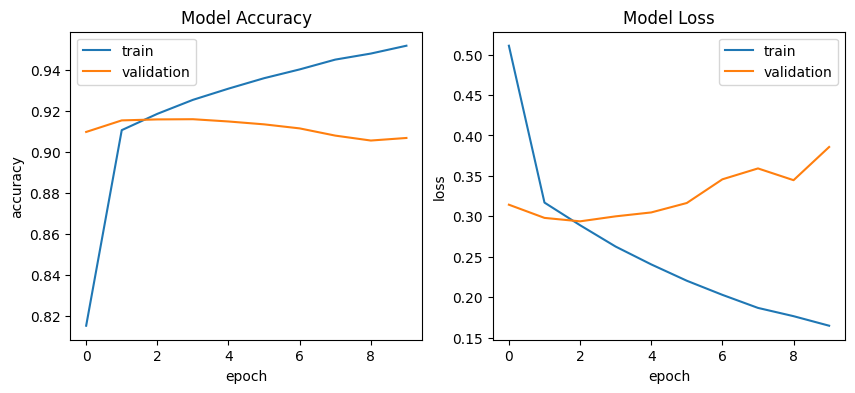

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

764/764 [==============================] - 12s 15ms/step


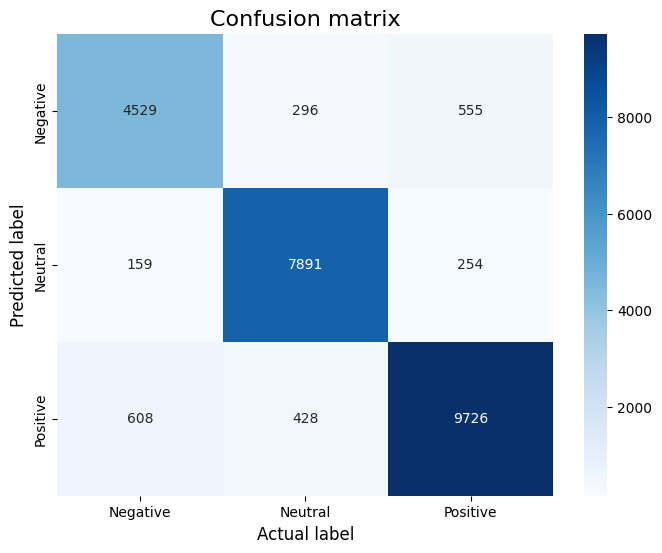

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))

    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    return cm, sentiment_classes

cm, sentiment_classes= plot_confusion_matrix(model, X_test, y_test)

***Nhận xét GRU model:***
- *Với các chỉ số precision, recall, và F1-Score cao, mô hình cho thấy khả năng cân bằng giữa việc phát hiện đúng và độ chính xác trong dự đoán.*
- *Mô hình có khả năng rất tốt trong việc nhận diện các tweet trung tính*
- *Đối với các tweet phản cảm, model có khả năng nhận diện khá cao*
- *Hiệu suất tổng thể (micro và weighted average) đều đạt 0.91, chứng tỏ mô hình duy trì được độ chính xác cao trên toàn bộ tập kiểm tra, bất kể sự chênh lệch về số lượng mẫu giữa các lớp.*

***Điểm mạnh***
- *Hiệu suất rất tốt ở các label không nhạy cảm và trung tính*

***Điểm yếu***
- *Hiệu suất tương đối cao(hơn 86%) cho label nhạy cảm, tuy nhiên vẫn hạn chế hơn 2 label ở trên.

*Có thể sử dụng biện pháp là thu thập thêm dataset để đưa ra nhận diện tốt hơn*

In [ ]:
model.save('best_model_GRU.h5')
print('Best model saved')

Best model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('/content/best_model_GRU.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Analyze Similarly

- *Sử dụng lớp embedding của model dể tiến hành phân tích tương đồng (analyze similarity).*
- *Phân tích tương đồng cho phép tính toán khoảng cách cosine giữa từ được yêu cầu với những từ gần nó (về khoảng cách).*
- *Tính toán được khoảng cách xong sẽ cho biết được hiệu quả của mô hình trong việc phân tích cảm xúc của các tweet*

In [ ]:
layer_embedding = model.get_layer('embedding')

In [ ]:
def analyze_similarity(embedding_layer, tokenizer, word):

    token_index = tokenizer.word_index[word]

    weights_embedding = embedding_layer.get_weights()[0]

    embedding = weights_embedding[token_index]

    similarities = cosine_similarity([embedding], weights_embedding)[0]

    similar_indices = np.argsort(similarities)[::-1][1:]

    print(f"Words most similar to '{word}':")
    for idx in similar_indices[:20]:
        similar_word = tokenizer.index_word[idx]
        similarity_score = similarities[idx]
        print(f"{similar_word}: {similarity_score:.4f}")

In [ ]:
analyze_similarity(layer_embedding, tokenizer, 'great')


Words most similar to 'great':
brilliant: 0.9640
best: 0.9470
outstanding: 0.9426
brave: 0.9413
beautifully: 0.9395
incredible: 0.9363
fitting: 0.9328
legendary: 0.9324
beautiful: 0.9309
lmao: 0.9307
welcome: 0.9262
excellent: 0.9216
deserving: 0.9214
wonderful: 0.9207
greatest: 0.9195
ideal: 0.9190
pleased: 0.9164
experienced: 0.9134
remarkable: 0.9112
amazing: 0.9111


In [ ]:
analyze_similarity(layer_embedding, tokenizer, 'worst')

Words most similar to 'worst':
evil: 0.9404
disgusting: 0.9223
anger: 0.9160
nasty: 0.9039
ruthless: 0.9021
pathetic: 0.9014
terrible: 0.8898
insane: 0.8894
shocking: 0.8851
worthless: 0.8849
wtf: 0.8845
corrupt: 0.8842
bloody: 0.8795
fake: 0.8764
unable: 0.8761
hate: 0.8760
boring: 0.8751
falsely: 0.8701
terribly: 0.8667
vicious: 0.8665


***Phân tích tương đồng***
- *Mô hình GRU phân loại tweet đã học được mối quan hệ giữa các từ và ngữ cảnh cảm xúc của chúng. Các từ gần gũi với "worst" đều có cảm xúc tiêu cực mạnh mẽ, như "evil", "disgusting", "anger", "nasty"*
- *Tương tự, các từ gần gũi với "great" đều mang ý nghĩa tích cực rõ ràng như "brilliant", "best", "outstanding", "brave".*
- *Các từ được liệt kê có điểm tương đồng cao (trên 0.85), cho thấy mô hình GRU duy trì được độ chính xác cao trong việc xác định từ vựng liên quan đến cảm xúc.*

#### Build a new tweet dataset

*Xây dựng một bộ dataset dựa trên bộ dataset cũ để tiến hành chạy thử model*

In [ ]:
new_tweets = [
    "according yogi imran masood kin azhar masood according this logic nirav modi lalit modi and narendra modi are brothers from the same mother",
    "agree but only during the tenure modiganga rejuvenation works have started working",
    "the three codes modi cracked give india huge foreign policy jumpstart via",
    "through our vote ensure govt need and deserve anupam kher responds modis vote kar appeal for the 2019 elections",
    "modi govts slashing indias education budget clear indicator that they dont care for indias future",
    "congress president shri the other hand has ensured the increase the budget gdp",
    "this the future india deserves",
    "being born religion where female deities worshipped its misogynistic sadistic tradition and totally against point isits man made tradition and not written one not religious lunatic support own religion its repressive",
    "how such people are being made amazedn fear that frustation him may not result vote against sir waste ministerdisgrace entire modi cabinet",
    "only modi",
    "check out latest article premier archery league via",
    "india second most optimistic globally about executive job growth shows the survey indias senior executives said that they are optimistic about the growth the number job roles this year",
    "people wish your vision india and least interested about your personal enmity with modi others its your personal problem handle this personally and dont expect nation will join your dirty fight with others tell why vote",
    "modi for eternal what wrong dear sirji perfectly fine with indian people",
    "impressive godrej tata complimenting our hoping gets second term",
    "our maid saying this rahul keeps saying modi kalla yet goes and hugs him and winks magand idu bekagittu",
    "please vote for modi congress trying divide india",
    "yes good job highly insensitivearrogant incompetent ploar needs defeated any costnobody knows why made such arrogant person minister gave tickethe out touch with grounddespite 3months upsc protests nvr met",
    "before 2014 hindustan has seen the worst for hindus own maj hindu rashtra who thrashed the rascal faces these anti indian politiciansantinationals urban naxals wait watch after modis win pakistan mein bhi hindu hona garv baat hogiâœŒ",
    "higher voting turnout directly proportional bjp victory wonder modi has launched campaigns like dont sit home ensure everyone your friends family relatives votes its now never for",
    "modi govt has done remarkable job making corruption free india ultimate success shall achieved when corrupt are jailed modi govts vision corruptionfree india ensuring that all those who looted the country are now facing the law via namo app",
    "use this beg for campaign",
]

In [ ]:
new_tweets_tokenized = tokenizer.texts_to_sequences(new_tweets)
new_tweets_padded = pad_sequences(new_tweets_tokenized, maxlen=max_len)

In [ ]:
predicted_sentiment = model.predict(new_tweets_padded)

sentiments = np.argmax(predicted_sentiment, axis=1)
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_predictions = [sentiment_labels[sentiment] for sentiment in sentiments]

for i, tweet in enumerate(new_tweets):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_predictions[i]}")
    print()

1/1 [==============================] - 0s 124ms/step
Tweet: according yogi imran masood kin azhar masood according this logic nirav modi lalit modi and narendra modi are brothers from the same mother
Predicted Sentiment: Neutral

Tweet: agree but only during the tenure modiganga rejuvenation works have started working
Predicted Sentiment: Neutral

Tweet: the three codes modi cracked give india huge foreign policy jumpstart via
Predicted Sentiment: Positive

Tweet: through our vote ensure govt need and deserve anupam kher responds modis vote kar appeal for the 2019 elections
Predicted Sentiment: Neutral

Tweet: modi govts slashing indias education budget clear indicator that they dont care for indias future
Predicted Sentiment: Negative

Tweet: congress president shri the other hand has ensured the increase the budget gdp
Predicted Sentiment: Neutral

Tweet: this the future india deserves
Predicted Sentiment: Neutral

Tweet: being born religion where female deities worshipped its misogy

#### Create a test function

- *Tạo một hàm cho người dùng nhập từ input, sau đó xuất ra kết quả tweet đã gắn nhãn*
- *Hàm predict sử dụng argmax, nó sẽ trả về nhãn có chỉ số xác xuất cao nhất*

In [ ]:
model = load_model('best_model_GRU.h5')

def predict_class():

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    text = input("Enter the text: ")

    xt = tokenizer.texts_to_sequences([text])
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    yt = model.predict(xt).argmax(axis=1)
    print('The predicted sentiment is', sentiment_classes[yt[0]])


In [ ]:
predict_class()

Enter the text: you is bad 
1/1 [==============================] - 0s 25ms/step
The predicted sentiment is Negative


### Data Preprocessing For Machine Learning Model

#### Load and Split data

In [ ]:
df_orther = data.copy()

In [ ]:
X = df_orther['clean_text']
y = df_orther['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### Vectorizer dataset

*Sử dụng phương pháp TF-IDF (Term Frequency-Inverse Document Frequency) để chuyển hóa các tweet thành các vector đặc trưng để đưa vào mô hình machine learning*

In [ ]:
vectorizer = TfidfVectorizer(max_features=max_word_token_negative)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
print("Kích thước tập huấn luyện:", X_train_vec.shape)
print("Kích thước tập kiểm tra:", X_test_vec.shape)

Kích thước tập huấn luyện: (138523, 9671)
Kích thước tập kiểm tra: (24446, 9671)


In [ ]:
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [ ]:
from google.colab import files
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_tweets_vec = vectorizer.transform(new_tweets)

### Multinomial Logistic Regression

#### Train model

In [ ]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, random_state=42)

In [ ]:
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=42)

In [ ]:
y_test_pred = clf.predict(X_test_vec)

In [ ]:
with open('clf_model.h5', 'wb') as f:
    pickle.dump(clf, f)

from google.colab import files
files.download('clf_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Evaluate the model

In [ ]:
accuracy_LR = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy_LR}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred, target_names=['Negative', 'Neutral', 'Positive']))

label_dict = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

Accuracy: 0.8957702691646895
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.78      0.83      5410
     Neutral       0.87      0.97      0.92      8313
    Positive       0.92      0.90      0.91     10723

    accuracy                           0.90     24446
   macro avg       0.89      0.88      0.89     24446
weighted avg       0.90      0.90      0.89     24446



In [ ]:
def plot_confusion_matrix_mle(model, X_test, y_test, class_names):

    y_pred = model.predict(X_test)

    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

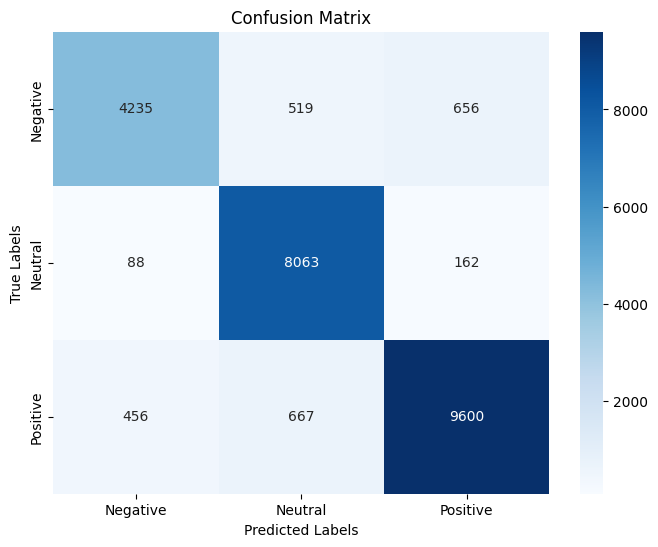

In [ ]:
class_names = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix_mle(clf, X_test_vec, y_test, class_names)

***Multinomial Logistic Regression***
- *Đạt được độ chính xác ổn định, tỷ lệ dự đoán sai cho nhãn nhạy cảm vẫn có thể được cải thiện hơn.*
- *Độ chính xác của nhãn không nhạy cảm đã được xác nhận cao*
- *Precision, Recall và F1-Score cho mỗi nhãn đều ở mức cao (0.89), cho thấy mô hình có khả năng cân bằng giữa việc tránh dự đoán sai và việc bao quát tất cả các trường hợp thực tế.*

#### Build a new tweet dataset

In [ ]:
predicted_sentiment = clf.predict(new_tweets_vec)
sentiment_labels = ['Negative', 'Neutral', 'Positive']

sentiments = predicted_sentiment.astype(int)

sentiment_predictions = [sentiment_labels[sentiment] for sentiment in sentiments]

# In ra nhãn dự đoán cho mỗi tweet mới
for i, tweet in enumerate(new_tweets):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_predictions[i]}")
    print()


Tweet: according yogi imran masood kin azhar masood according this logic nirav modi lalit modi and narendra modi are brothers from the same mother
Predicted Sentiment: Negative

Tweet: agree but only during the tenure modiganga rejuvenation works have started working
Predicted Sentiment: Negative

Tweet: the three codes modi cracked give india huge foreign policy jumpstart via
Predicted Sentiment: Neutral

Tweet: through our vote ensure govt need and deserve anupam kher responds modis vote kar appeal for the 2019 elections
Predicted Sentiment: Negative

Tweet: modi govts slashing indias education budget clear indicator that they dont care for indias future
Predicted Sentiment: Neutral

Tweet: congress president shri the other hand has ensured the increase the budget gdp
Predicted Sentiment: Negative

Tweet: this the future india deserves
Predicted Sentiment: Negative

Tweet: being born religion where female deities worshipped its misogynistic sadistic tradition and totally against poin

### Random Forest Classification

***Random Forest Model***
- *Sử dụng mô hình random forest để phân loại những tweet nhạy cảm.*
- *Trong đó sử dụng trình tối ưu GridSearchCV, đưa vào một tập tham số với số lượng cây để tối ưu.*
- *Sử dụng trong GridSearchCV số lượng 5 CV(5 fold) để chia dữ liệu trong quá trình cross validation*

#### Train model

In [ ]:
param_grid_rf= {
    'n_estimators': [100,200,300,400]
}


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42,n_jobs=-1)
grid_search_rfclass = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')

In [ ]:
grid_search_rfclass.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search_rfclass.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search_rfclass.best_score_))

Best parameters found:  {'n_estimators': 400}
Best cross-validation accuracy: 0.86


In [ ]:
y_pred_rf = grid_search_rfclass.predict(X_test_vec)

In [ ]:
with open('grid_search_rfclass_model.h5', 'wb') as f:
    pickle.dump(grid_search_rfclass, f)

from google.colab import files
files.download('/content/grid_search_rfclass_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Evaluate model

In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_RF}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive']))

label_dict = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

Accuracy: 0.864517712509204
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.69      0.77      5410
     Neutral       0.84      0.96      0.90      8313
    Positive       0.87      0.88      0.88     10723

    accuracy                           0.86     24446
   macro avg       0.87      0.84      0.85     24446
weighted avg       0.87      0.86      0.86     24446



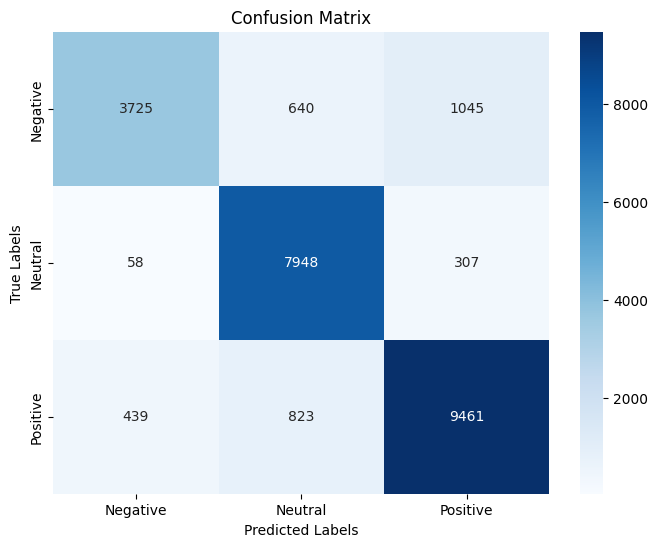

In [ ]:
plot_confusion_matrix_mle(grid_search_rfclass, X_test_vec, y_test,class_names)

***Random forest***
- *Hoạt động khá tốt với độ chính xác tổng thể cao.*
- *Hiệu suất rất tốt đối với các tweet trung lập và tích cực, nhưng cần cải thiện recall đối với các tweet tiêu cực.*
- *Hầu hết các tweet trung lập đều được nhận diện chính xác, nhưng precision thấp hơn một chút, chỉ ra rằng có một số tweet được dự đoán là trung lập nhưng thực tế không phải.*
- *Hiệu suất khá cân bằng giữa precision và recall, cho thấy mô hình khá hiệu quả trong việc phân loại các tweet tích cực.*
- *Độ chính xác (precision) cao cho thấy mô hình ít khi dự đoán sai các nhãn, nhưng recall của nhãn tiêu cực thấp chỉ ra rằng mô hình có thể bỏ sót một số lượng đáng kể các tweet tiêu cực.*

#### Build a new tweet dataset

In [ ]:
predicted_sentiment = grid_search_rfclass.predict(new_tweets_vec)
sentiment_labels = ['Negative', 'Neutral', 'Positive']

sentiments = predicted_sentiment.astype(int)

sentiment_predictions = [sentiment_labels[sentiment] for sentiment in sentiments]

for i, tweet in enumerate(new_tweets):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_predictions[i]}")
    print()

Tweet: according yogi imran masood kin azhar masood according this logic nirav modi lalit modi and narendra modi are brothers from the same mother
Predicted Sentiment: Negative

Tweet: agree but only during the tenure modiganga rejuvenation works have started working
Predicted Sentiment: Negative

Tweet: the three codes modi cracked give india huge foreign policy jumpstart via
Predicted Sentiment: Neutral

Tweet: through our vote ensure govt need and deserve anupam kher responds modis vote kar appeal for the 2019 elections
Predicted Sentiment: Negative

Tweet: modi govts slashing indias education budget clear indicator that they dont care for indias future
Predicted Sentiment: Neutral

Tweet: congress president shri the other hand has ensured the increase the budget gdp
Predicted Sentiment: Negative

Tweet: this the future india deserves
Predicted Sentiment: Negative

Tweet: being born religion where female deities worshipped its misogynistic sadistic tradition and totally against poin

###  Stochastic Gradient Descent (SGD)

#### Train model

In [ ]:
param_grid_sgd = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000,3000,5000],
    'tol': [1e-3, 1e-4],
    'learning_rate': ['optimal']
}

In [ ]:
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
grid_search_sgd = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid_sgd, cv=5, scoring='accuracy')

In [ ]:
grid_search_sgd.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['optimal'],
                         'max_iter': [1000, 3000, 5000],
                         'penalty': ['l1', 'l2'], 'tol': [0.001, 0.0001]},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search_sgd.best_params_)

Best parameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}


In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test_vec)

In [ ]:
with open('grid_search_sgd_model.h5', 'wb') as f:
    pickle.dump(grid_search_sgd, f)

from google.colab import files
files.download('/content/grid_search_sgd_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Evaluate model

In [ ]:
accuracy_SGD = accuracy_score(y_test, y_pred_sgd)
print(f'Accuracy: {accuracy_SGD}')
print('Classification Report:')
print(classification_report(y_test, y_pred_sgd, target_names=['Negative', 'Neutral', 'Positive']))

label_dict = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

Accuracy: 0.8503231612533748
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.67      0.76      5410
     Neutral       0.78      0.98      0.87      8313
    Positive       0.91      0.84      0.87     10723

    accuracy                           0.85     24446
   macro avg       0.86      0.83      0.83     24446
weighted avg       0.86      0.85      0.85     24446



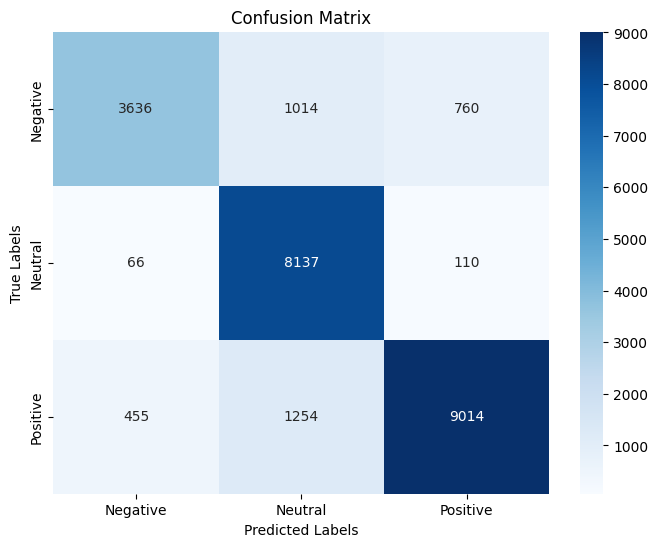

In [ ]:
plot_confusion_matrix_mle(grid_search_sgd, X_test_vec, y_test,class_names)

***Stochastis Gradient Descent***
- *Mô hình có độ chính xác cao (precision) trong việc xác định các tweet tiêu cực, nhưng recall thấp hơn, cho thấy mô hình bỏ lỡ nhiều tweet tiêu cực.*
- *Hiệu suất rất tốt đối với các tweet trung lập và tích cực, nhưng cần cải thiện recall đối với các tweet tiêu cực*

#### Build a new tweet dataset

In [ ]:
predicted_sentiment = grid_search_sgd.predict(new_tweets_vec)
sentiment_labels = ['Negative', 'Neutral', 'Positive']

sentiments = predicted_sentiment.astype(int)

sentiment_predictions = [sentiment_labels[sentiment] for sentiment in sentiments]

for i, tweet in enumerate(new_tweets):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_predictions[i]}")
    print()

Tweet: according yogi imran masood kin azhar masood according this logic nirav modi lalit modi and narendra modi are brothers from the same mother
Predicted Sentiment: Negative

Tweet: agree but only during the tenure modiganga rejuvenation works have started working
Predicted Sentiment: Negative

Tweet: the three codes modi cracked give india huge foreign policy jumpstart via
Predicted Sentiment: Neutral

Tweet: through our vote ensure govt need and deserve anupam kher responds modis vote kar appeal for the 2019 elections
Predicted Sentiment: Negative

Tweet: modi govts slashing indias education budget clear indicator that they dont care for indias future
Predicted Sentiment: Neutral

Tweet: congress president shri the other hand has ensured the increase the budget gdp
Predicted Sentiment: Negative

Tweet: this the future india deserves
Predicted Sentiment: Negative

Tweet: being born religion where female deities worshipped its misogynistic sadistic tradition and totally against poin

## MODEL EVALUATION AND COMPARISION

In [ ]:
report_gru = {
    'precision': [0.86, 0.92, 0.92, 0.91, 0.90, 0.91, 0.91],
    'recall': [0.84, 0.95, 0.90, 0.91, 0.90, 0.91, 0.91],
    'f1-score': [0.85, 0.93, 0.91, 0.91, 0.90, 0.91, 0.91],
    'support': [5380, 8304, 10762, 24446, 24446, 24446, 24446]
}

report_logistic_regression = {
    'precision': [0.89, 0.87, 0.92, 0.90, 0.89, 0.90],
    'recall': [0.78, 0.97, 0.90, 0.90, 0.88, 0.90],
    'f1-score': [0.83, 0.92, 0.91, 0.90, 0.89, 0.89],
    'support': [5410, 8313, 10723, 24446, 24446, 24446]
}

report_random_forest = {
    'precision': [0.88, 0.84, 0.87, 0.86, 0.87, 0.87],
    'recall': [0.69, 0.96, 0.88, 0.86, 0.84, 0.86],
    'f1-score': [0.77, 0.90, 0.88, 0.86, 0.85, 0.86],
    'support': [5410, 8313, 10723, 24446, 24446, 24446]
}

report_sgd = {
    'precision': [0.87, 0.78, 0.91, 0.86, 0.86, 0.86],
    'recall': [0.67, 0.98, 0.84, 0.85, 0.83, 0.85],
    'f1-score': [0.76, 0.87, 0.87, 0.85, 0.83, 0.85],
    'support': [5410, 8313, 10723, 24446, 24446, 24446]
}

In [ ]:
df_gru = pd.DataFrame(report_gru, index=['Negative', 'Neutral', 'Positive', 'accuracy', 'macro avg', 'weighted avg', 'samples avg'])
df_logistic_regression = pd.DataFrame(report_logistic_regression, index=['Negative', 'Neutral', 'Positive', 'accuracy', 'macro avg', 'weighted avg'])
df_random_forest = pd.DataFrame(report_random_forest, index=['Negative', 'Neutral', 'Positive', 'accuracy', 'macro avg', 'weighted avg'])
df_sgd = pd.DataFrame(report_sgd, index=['Negative', 'Neutral', 'Positive', 'accuracy', 'macro avg', 'weighted avg'])

df_gru.loc[''] = [np.nan] * len(df_gru.columns)
df_logistic_regression.loc[''] = [np.nan] * len(df_logistic_regression.columns)
df_random_forest.loc[''] = [np.nan] * len(df_random_forest.columns)

df_gru.columns.name = 'GRU'
df_logistic_regression.columns.name = 'Logistic Regression'
df_random_forest.columns.name = 'Random Forest'
df_sgd.columns.name = 'SGD Classifier'

df_combined = pd.concat([df_gru, df_logistic_regression, df_random_forest, df_sgd], keys=['GRU', 'Logistic Regression', 'Random Forest', 'SGD Classifier'])


In [ ]:
df_combined.fillna('')

precision recall f1-score  support
GRU                 Negative          0.86   0.84     0.85   5380.0
                    Neutral           0.92   0.95     0.93   8304.0
                    Positive          0.92    0.9     0.91  10762.0
                    accuracy          0.91   0.91     0.91  24446.0
                    macro avg          0.9    0.9      0.9  24446.0
                    weighted avg      0.91   0.91     0.91  24446.0
                    samples avg       0.91   0.91     0.91  24446.0
                                                                   
Logistic Regression Negative          0.89   0.78     0.83   5410.0
                    Neutral           0.87   0.97     0.92   8313.0
                    Positive          0.92    0.9     0.91  10723.0
                    accuracy           0.9    0.9      0.9  24446.0
                    macro avg         0.89   0.88     0.89  24446.0
                    weighted avg       0.9    0.9     0.89  24446.0
                                                                   
Random Forest       Negative          0.88   0.69     0.77   5410.0
                    Neutral           0.84   0.96      0.9   8313.0
                    Positive          0.87   0.88     0.88  10723.0
                    accuracy          0.86   0.86     0.86  24446.0
                    macro avg         0.87   0.84     0.85  24446.0
                    weighted avg      0.87   0.86     0.86  24446.0
                                                                   
SGD Classifier      Negative          0.87   0.67     0.76   5410.0
                    Neutral           0.78   0.98     0.87   8313.0
                    Positive          0.91   0.84     0.87  10723.0
                    accuracy          0.86   0.85     0.85  24446.0
                    macro avg         0.86   0.83     0.83  24446.0
                    weighted avg      0.86   0.85     0.85  24446.0

***ĐÁNH GIÁ TỔNG QUÁT***
- **GRU**
  - Ưu điểm:
    - Độ chính xác cao nhất trong số các mô hình
    - Precision, recall, và F1-score trung bình (macro avg) và trọng số (weighted avg) đều rất cao (0.90 hoặc 0.91).
    - Hiệu suất tốt đối với tất cả các nhãn, đặc biệt là nhãn trung lập.
  - Nhược điểm:
    - Yêu cầu tài nguyên tính toán cao hơn và thời gian huấn luyện lâu hơn so với các mô hình truyền thống.
    - Vẫn còn bỏ sót một số lượng tweet nhạy cảm.
- **Logistic Regression**
  - Ưu điểm:
    - Độ chính xác cao.
    - Hiệu suất tốt đối với các nhãn trung lập và tích cực.
  - Nhược điểm
    - Hiệu suất không bằng GRU, đặc biệt là với tweet nhạy cảm, recall chỉ đạt 0.78.
    - Khả năng phân biệt giữa các nhãn thấp hơn GRU
- **Random Forest**
  - Ưu điểm:
    - Độ chính xác tương đối cao.
    - Phản ứng tốt với nhãn trung lập và tích cực.
  - Nhược điểm:
    - Hiệu suất thấp, đặc biệt là với nhãn tiêu cực, recall chỉ đạt 0.69.
    - F1-score tổng thể thấp hơn so với GRU và Logistic Regression.
- **SGD**
  - Ưu điểm:
    - Độ chính xác tương đói cao
  - Nhược điểm:
    - Hiệu suất thấp nhất trong số các mô hình.
    - F1-score tổng thể thấp hơn so với GRU và Logistic Regression.





***SO SÁNH CÁC MÔ HÌNH***

- Accuracy (Độ chính xác):

GRU có độ chính xác cao nhất, tiếp theo là Logistic Regression. Random Forest và SGDClassifier có độ chính xác thấp hơn.

- Precision, Recall, F1-Score:

GRU có các chỉ số hiệu suất tốt nhất đối với tất cả các nhãn (Negative, Neutral, Positive).
Logistic Regression cũng có các chỉ số cao, đặc biệt là đối với nhãn Neutral và Positive.
Random Forest và SGDClassifier có hiệu suất thấp hơn, đặc biệt là đối với nhãn Negative.

- Macro Average và Weighted Average:

GRU dẫn đầu với các chỉ số macro và weighted average cao nhất, cho thấy hiệu suất đồng đều trên tất cả các nhãn.
Logistic Regression có các chỉ số gần với GRU.
Random Forest và SGDClassifier có các chỉ số thấp hơn.

- Thời gian huấn luyện và dự đoán:

Random Forest yêu cầu nhiều thời gian và tài nguyên tính toán nhất.
Tiếp đến là GRU.
Logistic Regression và SGDClassifier có thời gian huấn luyện và dự đoán nhanh nhất.
- Sự phức tạp của mô hình:

GRU là mô hình phức tạp nhất, tiếp theo là Random Forest.
Logistic Regression và SGDClassifier là các mô hình đơn giản hơn.

- Khả năng giải thích (Interpretability):

Logistic Regression và SGDClassifier dễ giải thích hơn so với Random Forest và GRU.

- Khả năng mở rộng (Scalability):

Logistic Regression và SGDClassifier có khả năng mở rộng tốt nhất, tiếp theo là Random Forest. GRU có khả năng mở rộng thấp nhất.

- Độ ổn định (Robustness):

GRU và Logistic Regression có độ ổn định cao nhất. Random Forest và SGDClassifier có độ ổn định trung bình.

- Độ nhạy cảm với dữ liệu (Sensitivity):

GRU ít nhạy cảm với sự thay đổi dữ liệu hơn so với Logistic Regression, Random Forest và SGDClassifier.

- Đánh giá chéo (Cross-validation):

GRU và Logistic Regression cho kết quả đánh giá chéo tốt nhất, trong khi Random Forest và SGDClassifier cho kết quả trung bình.

- Đồ thị ROC và AUC:

GRU và Logistic Regression có AUC cao nhất, cho thấy khả năng phân biệt giữa các nhãn tốt nhất.
Random Forest và SGDClassifier có AUC trung bình.

